In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [113]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [118]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: joblib>=0.11 in c:\programdata\anaconda3\lib\site-packages (from scikit-learn!=0.22.0->lightgbm) (0.17.0)



In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\Android_Permission.csv')
df

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.00,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.shape

(29999, 184)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Columns: 184 entries, App to Class
dtypes: float64(3), int64(176), object(5)
memory usage: 42.1+ MB


In [7]:
df.isnull().sum()

App                                                                      1
Package                                                                  0
Category                                                                 0
Description                                                              3
Rating                                                                   0
                                                                        ..
Your personal information : set alarm in alarm clock (S)                 0
Your personal information : write Browser's history and bookmarks (D)    0
Your personal information : write contact data (D)                       0
Your personal information : write to user defined dictionary (S)         0
Class                                                                    0
Length: 184, dtype: int64

In [8]:
df.dropna(inplace=True)
df

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ms Claus Live Wallpaper,tmc.christmaslady.livewallpaper,Personalization,Ms Claus Live Wallpaper<p>Find more Free apps ...,4.5,16,0.00,"{tmc.christmassanta.livewallpaper, tmc.winterh...",3.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.00,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df.columns

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : write contact data (D)',
       'Your personal information : write to user defined dictionary (S)',
       'Class'],
      dtype='object', length=184)

In [10]:
df.isnull().values.any()

False

In [11]:
df.dtypes

App                                                                       object
Package                                                                   object
Category                                                                  object
Description                                                               object
Rating                                                                   float64
                                                                          ...   
Your personal information : set alarm in alarm clock (S)                   int64
Your personal information : write Browser's history and bookmarks (D)      int64
Your personal information : write contact data (D)                         int64
Your personal information : write to user defined dictionary (S)           int64
Class                                                                      int64
Length: 184, dtype: object

In [12]:
df.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29240.000000,2.924000e+04,29240.000000,29240.000000,29240.000000,29240.000000,29240.000000,29240.0,29240.000000,29240.000000,...,29240.000000,29240.000000,29240.000000,29240.000000,29240.000000,29240.000000,29240.000000,29240.000000,29240.000000,29240.000000
mean,3.595951,6.935963e+03,0.580069,3.124590,1.368228,0.000308,0.000718,0.0,0.000410,0.000034,...,0.014877,0.088851,0.024179,0.001368,0.000581,0.000410,0.016826,0.040527,0.001539,0.661047
std,1.356938,4.597257e+04,3.197028,3.068755,1.531416,0.017542,0.026790,0.0,0.020254,0.005848,...,0.121062,0.284533,0.153608,0.036962,0.024106,0.020254,0.128622,0.197194,0.039200,0.473362
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,5.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,5.000000e+01,0.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.400000,7.700000e+02,0.000000,4.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,1.908590e+06,158.070000,30.000000,16.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#feature engineering
#Filling all missing values with 0
data = df.fillna(0)
#Filling missing values with medians of the columns
data = df.fillna(df.median())
data

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ms Claus Live Wallpaper,tmc.christmaslady.livewallpaper,Personalization,Ms Claus Live Wallpaper<p>Find more Free apps ...,4.5,16,0.00,"{tmc.christmassanta.livewallpaper, tmc.winterh...",3.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.00,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
##1.APP
df['App']

0               Canada Post Corporation
1                             Word Farm
2                  Fortunes of War FREE
3        Better Keyboard: Avatar Purple
5               Ms Claus Live Wallpaper
                      ...              
29994                   Beechwood Hotel
29995           ZDefense: Tower Defense
29996            Super Task Killer FREE
29997           Ambassador Hotel Taipei
29998                   Brain Ball Game
Name: App, Length: 29240, dtype: object

In [15]:
df['App'].nunique()

22176

In [16]:
df['App'].value_counts()

Tic Tac Toe                       45
????????????                      24
Slot Machine                      16
??????????????????                15
?????????????????????             14
                                  ..
RentMyCouch                        1
TV Ultimate                        1
Silent Camera                      1
Trouser Trouble Summer Edition     1
MLB News and More                  1
Name: App, Length: 22176, dtype: int64

In [17]:
df['App'].loc[df['App'].str.isnumeric()==False]

0               Canada Post Corporation
1                             Word Farm
2                  Fortunes of War FREE
3        Better Keyboard: Avatar Purple
5               Ms Claus Live Wallpaper
                      ...              
29994                   Beechwood Hotel
29995           ZDefense: Tower Defense
29996            Super Task Killer FREE
29997           Ambassador Hotel Taipei
29998                   Brain Ball Game
Name: App, Length: 29239, dtype: object

In [18]:
df['App']=df['App'].replace(['????????????','?????????????????????'],'NaN')

In [19]:
df['App'].value_counts()

Tic Tac Toe                      45
NaN                              38
Slot Machine                     16
??????????????????               15
Solitaire                        14
                                 ..
Publisher 2007 Video Training     1
RentMyCouch                       1
TV Ultimate                       1
Silent Camera                     1
MLB News and More                 1
Name: App, Length: 22175, dtype: int64

In [20]:
##2.package
df['Package']

0                          com.canadapost.android
1                       com.realcasualgames.words
2                              fortunesofwar.free
3        com.cc.betterkeyboard.skins.avatarpurple
5                 tmc.christmaslady.livewallpaper
                           ...                   
29994                         smartstay.beechwood
29995                       mobi.zstudio.avi.full
29996                        com.netqin.aotkiller
29997                         VMC.Ambassadorhotel
29998                myapp.lecz.android.tiltmazes
Name: Package, Length: 29240, dtype: object

In [21]:
df['Package'].nunique()

22815

In [22]:
df['Package'].value_counts()

com.shazam.android                                          10
com.poynt.android                                            9
com.apostek.SlotMachine                                      9
it.medieval.blueftp                                          9
com.mw.slotsroyale                                           8
                                                            ..
com.mobisystems.msdict.embedded.wireless.collins.mltkoit     1
com.alaskajim.randomtrivia1                                  1
kutamba.thrusterfree                                         1
jp.co.skynara.S11002731                                      1
webtechies.turkey.radioRecorderLow                           1
Name: Package, Length: 22815, dtype: int64

In [23]:
##3.description
df['Description']

0        Canada Post Mobile App gives you access to som...
1        Speed and strategy combine in this exciting wo...
2        Fortunes of War is a fast-paced, easy to learn...
3        Skin for Better Keyboard featuring a glossy fe...
5        Ms Claus Live Wallpaper<p>Find more Free apps ...
                               ...                        
29994    Beechwood is an Android hotel app for guests, ...
29995    Explosive Tower Defense!<p>Top Tower Defense G...
29996    Get it for FREE. Quickly Kill running apps. Fr...
29997    Key features of this App: <br>1. View photos o...
29998    A ball sits in a flat tray containing one or m...
Name: Description, Length: 29240, dtype: object

In [24]:
df['Description'].nunique()

22997

In [25]:
df['Description'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Canada Post Mobile App gives you access to som...
1        Speed and strategy combine in this exciting wo...
2        Fortunes of War is a fast-paced, easy to learn...
3        Skin for Better Keyboard featuring a glossy fe...
5        Ms Claus Live Wallpaper<p>Find more Free apps ...
                               ...                        
29994    Beechwood is an Android hotel app for guests, ...
29995    Explosive Tower Defense!<p>Top Tower Defense G...
29996    Get it for FREE. Quickly Kill running apps. Fr...
29997    Key features of this App: <br>1. View photos o...
29998    A ball sits in a flat tray containing one or m...
Name: Description, Length: 29240, dtype: object>

In [26]:
##4.category
df['Category']

0                Business
1          Brain & Puzzle
2          Cards & Casino
3        Libraries & Demo
5         Personalization
               ...       
29994      Travel & Local
29995     Arcade & Action
29996               Tools
29997      Travel & Local
29998      Brain & Puzzle
Name: Category, Length: 29240, dtype: object

In [27]:
df['Category'].nunique()

30

In [28]:
df['Category'].value_counts()

Entertainment        2664
Travel & Local       2099
Arcade & Action      1943
Books & Reference    1844
Brain & Puzzle       1814
Casual               1665
Personalization      1483
Lifestyle            1384
Tools                1316
Education            1278
Communication        1102
Finance              1042
Health & Fitness     1026
Business              939
Cards & Casino        871
Media & Video         768
Productivity          694
Sports                615
Comics                568
Libraries & Demo      560
Music & Audio         535
News & Magazines      477
Transportation        429
Shopping              392
Social                390
Sports Games          336
Photography           292
Racing                287
Medical               259
Weather               168
Name: Category, dtype: int64

In [29]:
##5. related apps 
df['Related apps']

0        {com.adaffix.pub.ca.android, com.kevinquan.gas...
1        {air.com.zubawing.FastWordLite, com.joybits.do...
2        {com.kevinquan.condado, hu.monsta.pazaak, net....
3        {eu.gdumoulin.betterandroid.skins.transparent....
5        {tmc.christmassanta.livewallpaper, tmc.winterh...
                               ...                        
29994    {com.bluewaterpages, com.travelconnection.luxu...
29995    {com.entwicklerx.swampdefense, com.digimentgam...
29996    {com.guardam.TaskKiller, com.netqin.authtoken_...
29997    {com.hyxen.app.NewTaipeiTravel, j2ab.android.t...
29998    {com.twistedmirror.alberiplus, com.freesoul.Mo...
Name: Related apps, Length: 29240, dtype: object

In [30]:
df['Related apps'].nunique()

23864

In [31]:
df['Related apps'].value_counts()

{com.openkava.spinpic}                                                                                                                                          38
{ru.onedayonegirl.app}                                                                                                                                          15
{com.xcr.android.mytixdude}                                                                                                                                     12
{com.ap.SnapPhoto_Pro, hsware.HSTempo, com.google.android.panoramio, com.blau.android.screenon}                                                                 10
{com.apostek.slotmachinechristmas, com.apostek.slotmachinehalloween, com.jawahar.CasinoVegasSlot, com.slot.slotmachine}                                          9
                                                                                                                                                                ..
{com.chromeinfotech.fi

In [32]:
df.columns.value_counts().sum()

184

In [10]:
columns=df.columns.values

In [11]:
dangerous_count=[]
for i in range(len(df)):
    sum=0
    for j in range(10,184):
        if '(D)' in columns[j]:
            sum+=df.iloc[i,j]
    dangerous_count.append(sum)
        

In [12]:
df['Dangerous permissions Count']=dangerous_count

In [15]:
apps=df.drop(['Package','Related apps'],axis=1)

In [16]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
def clean_text(text):
    text_list = []
    for i in text:
        temp = ""
    # consider we have text like this "Brain & Puzzle, Business"
        for j in i.split(','): # it will split it in two parts ["Brain & Puzzle", "Business"]
            if 'The' in j.split(): # this will split each of the catogory based on space "Brain & Puzzle"=> "Brain","&", "Puzzle"
                j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Brain & Puzzle"=>"Brain&Puzzle"
            temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        text_list.append(temp.strip())
    return text_list

In [17]:
apps['App']=apps['App'].fillna('adw theme apk')

In [18]:
apps['Description']=apps['Description'].fillna(apps['App'])

In [19]:
categories = list(apps['Category'].values)
apps['Category'] = clean_text(categories) 


In [20]:
apps['Category'].value_counts()

Entertainment      2827
Travel_Local       2154
Arcade_Action      1959
Books_Reference    1959
Brain_Puzzle       1873
Casual             1678
Personalization    1527
Lifestyle          1435
Tools              1329
Education          1305
Communication      1103
Finance            1045
Health_Fitness     1038
Business            945
Cards_Casino        881
Media_Video         782
Productivity        695
Sports              632
Libraries_Demo      611
Comics              585
Music_Audio         553
News_Magazines      480
Transportation      434
Shopping            401
Social              399
SportsGames         341
Photography         297
Racing              288
Medical             270
Weather             173
Name: Category, dtype: int64

In [21]:
app_names=list(apps['App'].values)
apps['App'] = clean_text(app_names)

In [22]:
cleaned_apps=apps.drop(['Dangerous permissions count','App'],axis=1)

In [23]:
cleaned_apps.head()

,Category,Description,Rating,Number of ratings,Price,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),...,Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class,Dangerous permissions Count
0,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,7
1,Brain_Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Cards_Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Libraries_Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


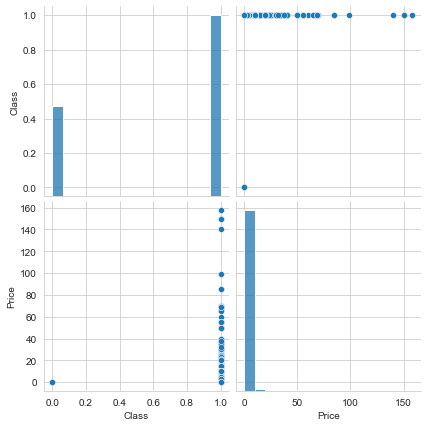

In [24]:
#EDA
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(df[['Class','Price']], size=3)
plt.show()

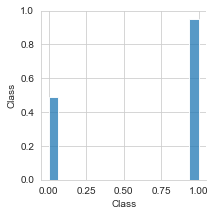

In [46]:
sns.set_style("whitegrid")
sns.pairplot(df[['Class','Package']], size=3)
plt.show()

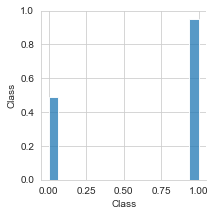

In [47]:
sns.set_style("whitegrid")
sns.pairplot(df[['Class','Category']], size=3)
plt.show()

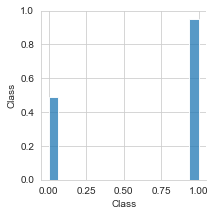

In [48]:
sns.set_style("whitegrid")
sns.pairplot(df[['Class','Description']], size=3)
plt.show()

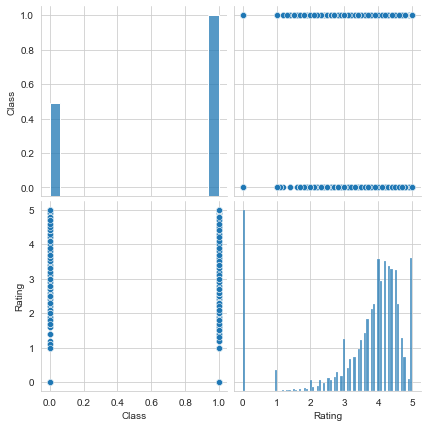

In [49]:
sns.set_style("whitegrid")
sns.pairplot(df[['Class','Rating']], size=3)
plt.show()

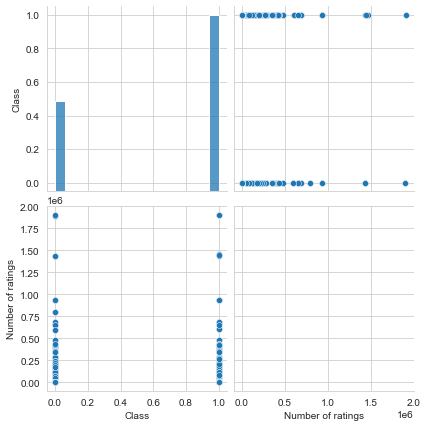

In [50]:
sns.set_style("whitegrid")
sns.pairplot(df[['Class','Number of ratings']], size=3)
plt.show()

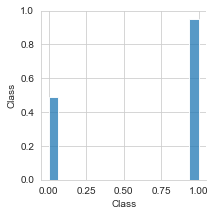

In [51]:
sns.set_style("whitegrid")
sns.pairplot(df[['Class','Related apps']], size=3)
plt.show()

Number of apps that are benign  19329 , ( 66.1046511627907 %)
Number of apps that are malign  9911 , ( 33.895348837209305 %)


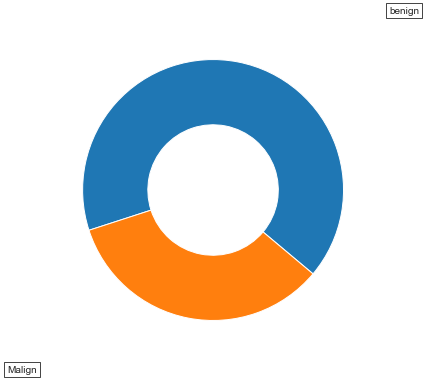

In [52]:
##from here we can see there is a class imbalance problem in the dataset.
y_value_counts = cleaned_apps['Class'].value_counts()
print("Number of apps that are benign ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of apps that are malign ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["benign", "Malign"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


plt.show()

In [53]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(cleaned_apps.groupby("Category")["Class"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)

temp.columns = ['Category_code', 'num_apps']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp['num_apps']=temp['num_apps'].apply(lambda x:1-x)
temp.sort_values(by=['num_apps'], inplace=True)
print("Category with lowest % apps identified as malign")
print(temp.head(5))
print('='*50)
print("Category with highest % apps identified as malign")
print(temp.tail(5))

Category with lowest % apps identified as malign
     Category_code  num_apps
27  Transportation  0.009324
15         Medical  0.011583
28    Travel_Local  0.015722
24          Sports  0.037398
17  News_Magazines  0.075472
Category with highest % apps identified as malign
     Category_code  num_apps
14     Media_Video  0.532552
3         Business  0.554846
4     Cards_Casino  0.678530
12  Libraries_Demo  0.825000
6           Comics  0.883803


In [54]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='Class', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)
    plt.ylabel('Apps')
    plt.title('% of apps found malign category wise')
    plt.xticks(ind, list(data[xtick].values),rotation=90)
    plt.legend((p1[0], p2[0]), ('total', 'benign'))
    plt.show()

In [55]:
def univariate_barplots(data, col1, col2='Class', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

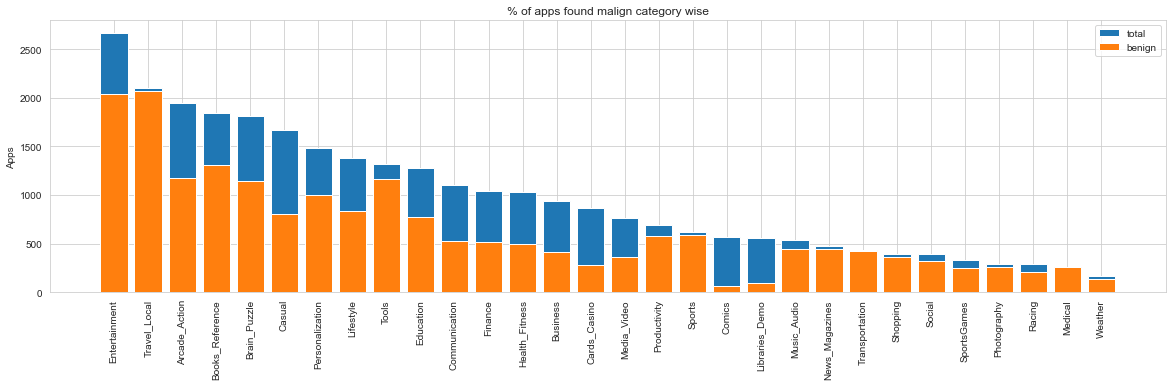

           Category  Class  total       Avg
9     Entertainment   2041   2664  0.766141
28     Travel_Local   2066   2099  0.984278
0     Arcade_Action   1178   1943  0.606279
1   Books_Reference   1307   1844  0.708785
2      Brain_Puzzle   1143   1814  0.630099
       Category  Class  total       Avg
25  SportsGames    248    336  0.738095
19  Photography    258    292  0.883562
21       Racing    207    287  0.721254
15      Medical    256    259  0.988417
29      Weather    134    168  0.797619


In [56]:
univariate_barplots(cleaned_apps, 'Category', 'Class', False)

In [57]:
def plot_boxplot(data,feature):
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
    benign = data[data['Class']==1][feature].values
    malign = data[data['Class']==0][feature].values
    plt.boxplot([benign, malign])
    plt.title('Box Plots of {} per benign and malign apps'.format(feature))
    plt.xticks([1,2],('benign apps','malign apps'))
    plt.ylabel(feature)
    plt.grid()
    plt.show()

In [58]:
def plot_pdfs(data,feature):
    plt.figure(figsize=(10,3))
    benign = data[data['Class']==1][feature].values
    malign = data[data['Class']==0][feature].values
    sns.distplot(benign, hist=False, label="benign apps")
    sns.distplot(malign, hist=False, label="malign apps")
    plt.title('{} per malign and benign apps'.format(feature))
    plt.xlabel('{} of an app'.format(feature))
    plt.legend()
    plt.show()

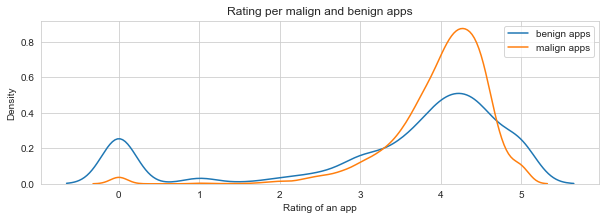

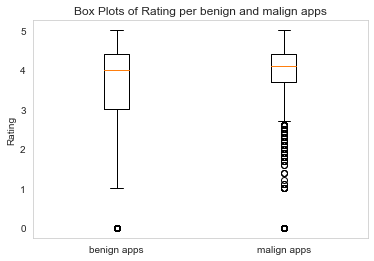

In [59]:
plot_pdfs(cleaned_apps,'Rating')
plot_boxplot(cleaned_apps,'Rating')
          

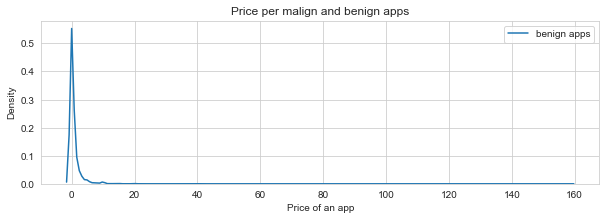

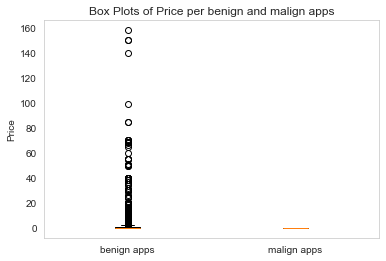

In [60]:
plot_pdfs(cleaned_apps,'Price')
plot_boxplot(cleaned_apps,'Price')

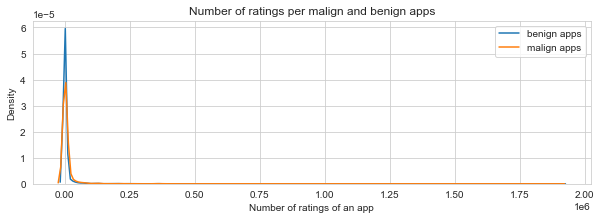

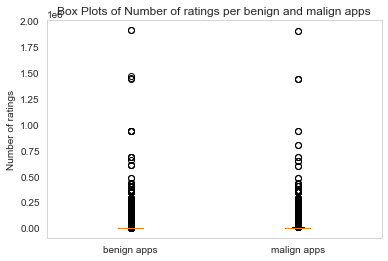

In [61]:
plot_pdfs(cleaned_apps,'Number of ratings')
plot_boxplot(cleaned_apps,'Number of ratings')

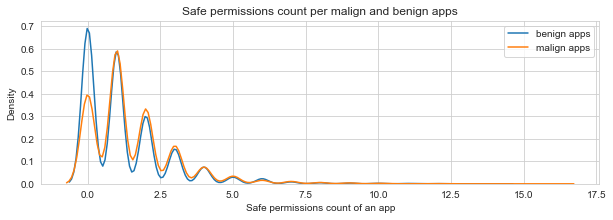

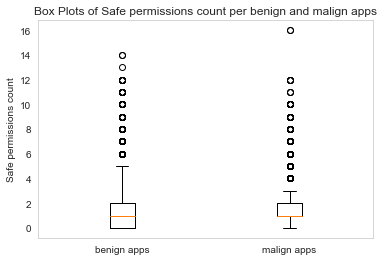

In [62]:
plot_pdfs(cleaned_apps,'Safe permissions count')
plot_boxplot(cleaned_apps,'Safe permissions count')

In [32]:
#3.z score 
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [33]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
STOP_WORDS = stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        if type(sent) == type(''):
            example1 = BeautifulSoup(sent)
            sent = example1.get_text()
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in STOP_WORDS)
        sent=re.sub("[\d-]",'',sent)#remove digits
        porter=PorterStemmer()
        sent = ' '.join(porter.stem(e) for e in sent.split())
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [36]:
preprocessed_description = preprocess_text(cleaned_apps['Description'].values)

100%|██████████| 29999/29999 [03:44<00:00, 133.78it/s]


In [37]:
preprocessed_description[300]

'track babi eat sleep poop esp great new parent babi esp babi activ tracker help easili log babi activ eat sleep poop much know glanc time sinc babi last meal nap diaper chang use thousand parent track million diaper million nurs session full version five star rate rate app free day trial babi esp give chanc tri everyth buy full version featur enabl except sync multipl devic basic featur track nap night sleep track breast feed session track bottl track diaper track medicin track breast pump track bath track growth growth chart track number children track custom activ medicin want add quick access widgetadvanc featur get remind time medicin activ detail statist show averag total activ chart show babi chang time compar multipl babi daili journal note pictur night mode dim screen tint red preserv night vision night feed share data anyon quickli easili email post chart facebook twitter store note activ search within app activ type note journal entri customiz main screen access data import 

In [38]:
cleaned_apps['Description']=preprocessed_description

In [39]:
columns=cleaned_apps.columns.values
new_column_names=[]
for i in columns:
    s=i.split()
    d=[]
    for j in s:
        if j==':' or j=='.' or j=='(S)' or j=='(D)':
            pass
        else:
            d.append(j)
    final='_'.join(d)
    new_column_names.append(final)

In [40]:
cleaned_apps.columns=new_column_names

In [41]:
remove_dots=[]
for i in cleaned_apps.columns.values:
  remove_dots.append(i.strip('.'))


In [42]:
cleaned_apps.columns=remove_dots


In [43]:
cleaned_apps.head()

,Category,Description,Rating,Number_of_ratings,Price,Safe_permissions_count,Default_Access_DRM_content,Default_Access_Email_provider_data,Default_Access_all_system_downloads,Default_Access_download_manager,...,Your_personal_information_read_contact_data,Your_personal_information_read_sensitive_log_data,Your_personal_information_read_user_defined_dictionary,Your_personal_information_retrieve_system_internal_state,Your_personal_information_set_alarm_in_alarm_clock,Your_personal_information_write_Browser's_history_and_bookmarks,Your_personal_information_write_contact_data,Your_personal_information_write_to_user_defined_dictionary,Class,Dangerous_permissions_Count
0,Business,canada post mobil app give access popular tool...,3.1,77,0.00,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,7
1,Brain_Puzzle,speed strategi combin excit word search clock ...,4.3,199,0.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Cards_Casino,fortun war fast pace easi learn challeng card ...,4.1,243,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Libraries_Demo,skin better keyboard featur glossi feel must d...,3.6,2589,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lifestyle,box day christoph jaymesbas true stori surroun...,0.0,0,5.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [44]:
cleaned_apps['Category']=cleaned_apps['Category'].apply(lambda x:x.lower())

In [45]:
cleaned_apps.head()

,Category,Description,Rating,Number_of_ratings,Price,Safe_permissions_count,Default_Access_DRM_content,Default_Access_Email_provider_data,Default_Access_all_system_downloads,Default_Access_download_manager,...,Your_personal_information_read_contact_data,Your_personal_information_read_sensitive_log_data,Your_personal_information_read_user_defined_dictionary,Your_personal_information_retrieve_system_internal_state,Your_personal_information_set_alarm_in_alarm_clock,Your_personal_information_write_Browser's_history_and_bookmarks,Your_personal_information_write_contact_data,Your_personal_information_write_to_user_defined_dictionary,Class,Dangerous_permissions_Count
0,business,canada post mobil app give access popular tool...,3.1,77,0.00,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,7
1,brain_puzzle,speed strategi combin excit word search clock ...,4.3,199,0.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,cards_casino,fortun war fast pace easi learn challeng card ...,4.1,243,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,libraries_demo,skin better keyboard featur glossi feel must d...,3.6,2589,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,lifestyle,box day christoph jaymesbas true stori surroun...,0.0,0,5.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [46]:
from wordcloud import WordCloud, STOPWORDS

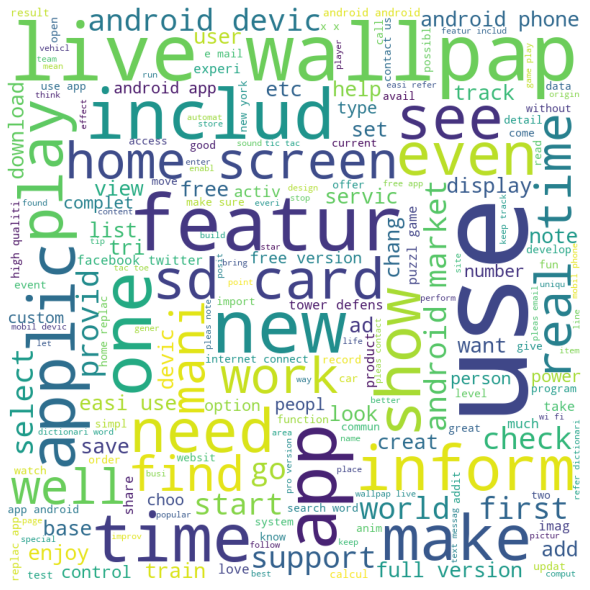

In [78]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the essay column  
for val in cleaned_apps['Description'].values: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
  # plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [47]:
y=cleaned_apps['Class']
X=cleaned_apps.drop(['Class'],axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.2,random_state=21,stratify=y)

In [49]:
len(X_train)

23999

In [50]:
y=cleaned_apps['Class']
X=cleaned_apps.drop(['Class'],axis=1)


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3,random_state=21,stratify=y)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for i in ['Rating','Number_of_ratings','Price','Safe_permissions_count','Dangerous_permissions_Count']:
    X_train[i]=scaler.fit_transform(X_train[i].values.reshape(-1,1))
    X_test[i]=scaler.transform(X_test[i].values.reshape(-1,1))

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
vectorizer_desc = TfidfVectorizer(min_df=5,ngram_range=(1,3),max_features=7000)#max_features=200 mean dictionary will consist max 200 words


In [55]:
x_train_description=vectorizer_desc.fit_transform(X_train['Description'].values)

In [56]:
df1=pd.DataFrame(x_train_description.toarray())

In [89]:
df1

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.021951,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
20464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
20465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
20466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
x_test_description = vectorizer_desc.transform(X_test['Description'].values)

In [58]:
vectorizers=[]
vectorizers.append(vectorizer_desc)

In [59]:
Columns_feat=[]#Features list to store feature name
Columns_feat.append(vectorizer_desc.get_feature_names())

In [60]:
vectorizer_category=CountVectorizer(binary=True)
x_train_category_ohe=vectorizer_category.fit_transform(X_train['Category'].astype('str').values)
x_test_category_ohe=vectorizer_category.transform(X_test['Category'].astype('str').values)
Columns_feat.append(vectorizer_category.get_feature_names())
vectorizers.append(vectorizer_category)

In [61]:
pd.DataFrame(x_train_category_ohe.toarray())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20995,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
features=[]
for i in Columns_feat:
    for j in i:
        features.append(j)

In [63]:
from scipy.sparse import hstack
#conactinating all the features
X_train_total=hstack((x_train_description,x_train_category_ohe)).tocsr()
X_test_total=hstack((x_test_description,x_test_category_ohe)).tocsr()

In [64]:
pd.DataFrame(X_train_total.toarray())

,0,1,2,3,4,5,6,7,8,9,...,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
desc_category_train=pd.DataFrame(X_train_total.toarray())
desc_category_train=desc_category_train.reset_index()

In [66]:
len(desc_category_train)

20999

In [67]:
X_train=X_train.reset_index()


In [68]:
X_train_final=pd.concat([desc_category_train, X_train],axis=1)

In [69]:
desc_category_test=pd.DataFrame(X_test_total.toarray())
desc_category_test=desc_category_test.reset_index()

In [70]:
X_test=X_test.reset_index()
X_test_final=pd.concat([desc_category_test, X_test], axis=1)

In [71]:
x_train=X_train_final.drop(['index','Category','Description'],axis=1)
x_test=X_test_final.drop(['index','Category','Description'],axis=1)

In [72]:
len(x_test)

9000

In [106]:
### Model Evaluation

In [76]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [77]:
pred_prob1 = logreg.predict_proba(x_test)

In [78]:
y_pred_lr = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [79]:
###Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix)

[[2228  772]
 [ 763 5237]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3000
           1       0.87      0.87      0.87      6000

    accuracy                           0.83      9000
   macro avg       0.81      0.81      0.81      9000
weighted avg       0.83      0.83      0.83      9000



In [81]:
#decision tree:
from sklearn.tree import DecisionTreeClassifier  
clf= DecisionTreeClassifier(criterion='entropy', random_state=0)  
clf.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [82]:
#Predicting the test set result  
y_pred_dt = clf.predict(x_test)

In [83]:
pred_prob2 = clf.predict_proba(x_test)

In [84]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred_dt))

Accuracy Score on train data:  0.9920948616600791
Accuracy Score on test data:  0.8072222222222222


In [85]:
# naive bayes
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [86]:
# making predictions on the testing set
y_pred_nb = gnb.predict(x_test)

In [87]:
pred_prob3 = gnb.predict_proba(x_test)

In [88]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_nb)*100)

Gaussian Naive Bayes model accuracy(in %): 67.76666666666667


In [89]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state = 30)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=30)

In [90]:
y_pred_rf = rf.predict(x_test)

In [91]:
pred_prob4 = rf.predict_proba(x_test)

In [92]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred_rf))

Accuracy Score on train data:  0.9920948616600791
Accuracy Score on test data:  0.8062222222222222


In [93]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

In [94]:
#KNN:
#from sklearn.neighbors import KNeighborsClassifier 
#knn= KNeighborsClassifier(n_neighbors=15)
#knn.fit(x_train,y_train)
#y_pred=knn.predict(x_test)

In [95]:
#pred_prob5 = rf.predict_proba(x_test)

In [96]:
#y_pred

In [97]:
#ada-boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ad=AdaBoostClassifier()
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
AdaBoostClassifier(n_estimators=100, random_state=0)
clf.predict([[0, 0, 0, 0]])
clf.score(X, y)

0.983

In [98]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [99]:
sgd=linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')

In [103]:
sgd.fit(x_train,y_train)

-- Epoch 1
Norm: 0.31, NNZs: 7184, Bias: 0.210365, T: 20999, Avg. loss: 0.646014
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.49, NNZs: 7184, Bias: 0.298349, T: 41998, Avg. loss: 0.607788
Total training time: 1.31 seconds.
-- Epoch 3
Norm: 0.62, NNZs: 7184, Bias: 0.348344, T: 62997, Avg. loss: 0.592890
Total training time: 1.95 seconds.
-- Epoch 4
Norm: 0.73, NNZs: 7184, Bias: 0.383379, T: 83996, Avg. loss: 0.583328
Total training time: 2.60 seconds.
-- Epoch 5
Norm: 0.83, NNZs: 7184, Bias: 0.413279, T: 104995, Avg. loss: 0.576007
Total training time: 3.22 seconds.
-- Epoch 6
Norm: 0.92, NNZs: 7184, Bias: 0.435422, T: 125994, Avg. loss: 0.569955
Total training time: 3.86 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 7184, Bias: 0.460214, T: 146993, Avg. loss: 0.564737
Total training time: 4.50 seconds.
-- Epoch 8
Norm: 1.09, NNZs: 7184, Bias: 0.480715, T: 167992, Avg. loss: 0.560108
Total training time: 5.16 seconds.
-- Epoch 9
Norm: 1.17, NNZs: 7184, Bias: 0.499310, T: 188991, Avg. l

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

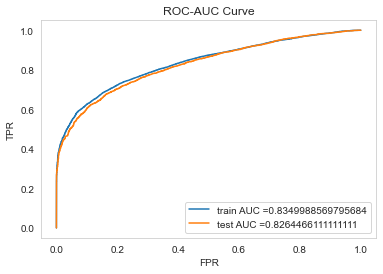

In [104]:
from sklearn.metrics import roc_curve, auc
y_train_pred = sgd.predict_proba(x_train)[:,1]    
y_test_pred = sgd.predict_proba(x_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.title("ROC-AUC Curve")
plt.grid()
plt.show()

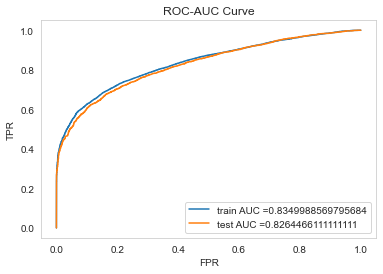

In [105]:
from sklearn.metrics import roc_curve, auc
y_train_pred = sgd.predict_proba(x_train)[:,1]    
y_test_pred = sgd.predict_proba(x_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC Curve")
plt.grid()
plt.show()

In [111]:
import xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [124]:
xgb = XGBClassifier(max_depth=1,n_estimators=1200)
xgb.fit(x_train,y_train)

[15:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

In [120]:
xgb = LGBMClassifier()
xgb.fit(x_train,y_train)

LGBMClassifier()

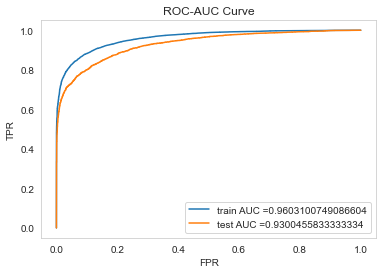

In [125]:
from sklearn.metrics import roc_curve, auc
y_train_pred = xgb.predict_proba(x_train)[:,1]    
y_test_pred = xgb.predict_proba(x_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC Curve")
plt.grid()
plt.show()

In [126]:
##grouping into benign or malware.
# Getting count of belignant and maganat
df['Class'].value_counts()

1    20000
0     9999
Name: Class, dtype: int64

In [127]:
df['Class'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        1
        ..
29994    1
29995    1
29996    1
29997    1
29998    1
Name: Class, Length: 29999, dtype: int64>

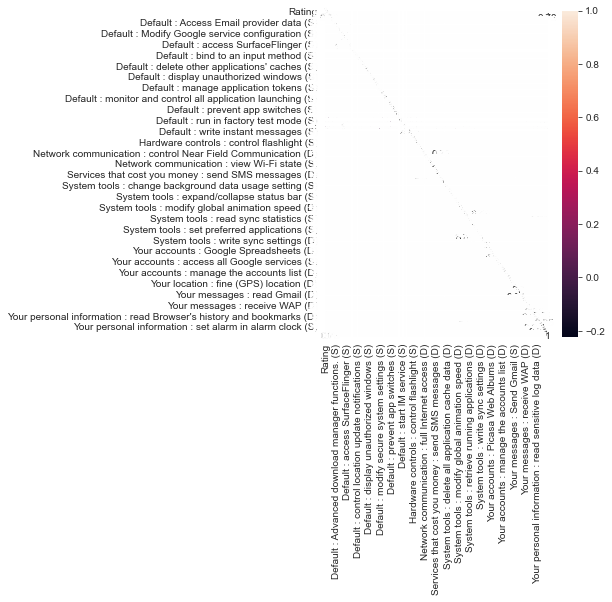

In [128]:
##feature selection
#1.correlation coefficient 
cor=df.corr()
#plotting heatmap 
plt.figure(figsize=(5,6))
sns.heatmap(cor,annot=True)
plt.show()

In [129]:
#variance treshhold
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(threshold=.5)
X_high_variance = thresholder.fit_transform(X)
print(X_high_variance[0:8])

[[-1.66853167 -1.29901346  0.2746472  -0.60362044]
 [-2.9728827  -1.08878294  0.70885958  0.42281857]
 [-0.59614125 -1.37007001 -3.11685659  0.64445203]
 [-1.06894674 -1.17505738 -1.91374267  0.66356158]
 [-1.30526888 -0.96592566 -0.1540724   1.19361168]
 [-2.18261832 -0.97011387 -0.09816121 -0.88661426]
 [-1.24797892 -1.13094525 -0.14735366  1.05980629]
 [-1.35308792 -1.06633681  0.02624662 -0.11433516]]


In [130]:
import xgboost
from xgboost import XGBClassifier

In [132]:
xgb = XGBClassifier(max_depth=1,n_estimators=1200)
xgb.fit(x_train,y_train)

[15:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

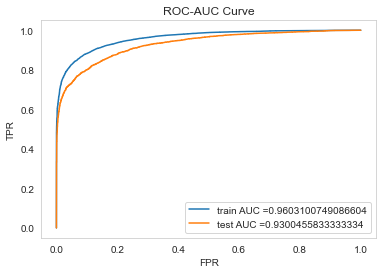

In [133]:
from sklearn.metrics import roc_curve, auc
y_train_pred = xgb.predict_proba(x_train)[:,1]    
y_test_pred = xgb.predict_proba(x_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC Curve")
plt.grid()
plt.show()

In [143]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=59,
                               max_depth=25,
                               min_samples_split=6, 
                               bootstrap = True,
                               max_features = 'auto')
# Fit on training data
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_split=6, n_estimators=59)

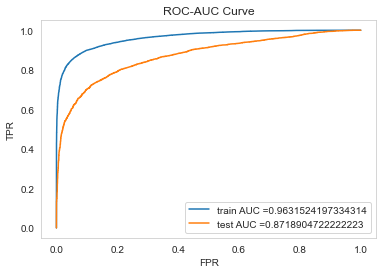

In [144]:
from sklearn.metrics import roc_curve, auc
y_train_pred = model.predict_proba(x_train)[:,1]    
y_test_pred = model.predict_proba(x_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC Curve")
plt.grid()
plt.show()

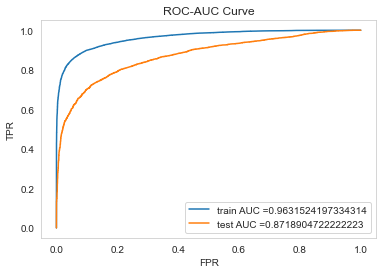

In [149]:
from sklearn.metrics import roc_curve, auc
y_train_pred = model.predict_proba(x_train)[:,1]    
y_test_pred = model.predict_proba(x_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC Curve")
plt.grid()
plt.show()

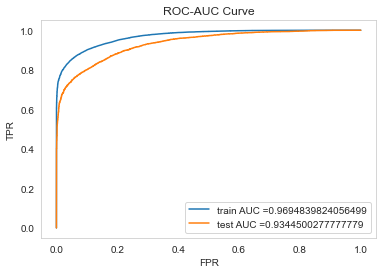

In [156]:
from sklearn.metrics import roc_curve, auc
y_train_pred = xgb.predict_proba(x_train)[:,1]    
y_test_pred = xgb.predict_proba(x_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC Curve")
plt.grid()
plt.show()